In [ ]:
#생선의 길이로 무게 예측하기_단순선형회귀분석

In [2]:
import numpy as np

In [4]:
#농어의 길이와 무게 데이터
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])

In [5]:
from sklearn.model_selection import train_test_split

#훈련 데이터와 테스트 데이터로 나누기
train_input, test_input, train_target, test_target = train_test_split(
    fish_length, fish_weight, random_state=42)

# 2차원 배열로 바꾸기
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)


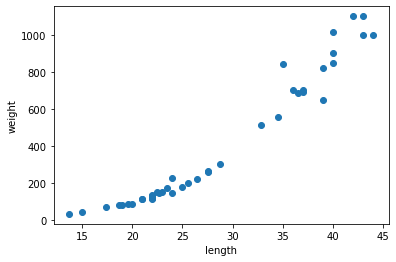

In [6]:
#산점도를 그리기위한 라이브러리
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [7]:
#생선의 길이가 길수록 무게가 많이 나가는 선형관계이다.

In [8]:
from sklearn.linear_model import LinearRegression

#학습
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [11]:
#길이가 50인 농어의 무게 예측하기
print(lr.predict([[50]]))

[1241.83860323]


In [10]:
#가중치와 절편 확인
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


In [ ]:
# y = 39.01714496 * x - 709.0186449535477 의 방정식을 얻을 수 있다.

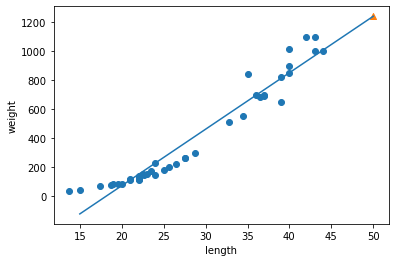

In [12]:
# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프 그리기
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
#어느정도 선형관계가 보인다.

In [13]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.8247503123313559


In [ ]:
#훈련 데이터는 약 94%의 정확도를 가지고 있지만, 
#테스트 데이터는 약 82% 정확도를 가지고 있다. 
#그러므로 과대적합되었다고 할 수 있다. 